# NLP SENTIMENT ANALYSIS ON UKRAINE WAR
# Tymek
This cell imports a variety of Python libraries and packages that are commonly used in data analysis, text processing, and visualization tasks:

- zipfile, os, gzip, shutil: Used for file handling operations like reading, writing, and extracting compressed files.
- pandas: Essential for data manipulation and analysis, particularly for working with structured data.
- ast, numpy: For numerical operations. numpy is key for numerical computations, and ast helps in processing tree-like data structures.
- seaborn, matplotlib.pyplot: Visualization libraries for creating graphs and plots.
- json: For parsing JSON data.
- textblob, nltk: Natural Language Processing (NLP) libraries. textblob simplifies text processing and sentiment analysis. nltk is used for more complex NLP tasks.
- re: Regular expressions library for text pattern searching and manipulation.
- The script also includes commands to download specific datasets and models (nltk.download()) used in NLP, indicating that text analysis tasks, possibly including sentiment analysis, are likely to be performed.







In [1]:
import zipfile
import os
import gzip
import shutil
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import textblob
from textblob import TextBlob
import nltk
import re

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('movie_reviews')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tymek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tymek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Tymek\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tymek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Tymek\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tymek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

True

## Defining helper functions

In [2]:
def unzip_all_in_directory(directory):
    unzipped_files = []
    for item in os.listdir(directory):  # Loop through items in dir
        if item.endswith('.zip'):  # Check for ".zip" extension
            file_path = os.path.join(directory, item)  # Get full path of the file
            with zipfile.ZipFile(file_path, 'r') as zip_ref:  # Create ZipFile object
                zip_ref.extractall(directory)  # Extract all the contents into the directory
                unzipped_files.extend(zip_ref.namelist())
            print(f'Unzipped: {item}')
    return unzipped_files

def gzip_to_dataframe(gzip_file_path):
    # Read the gzip file into a pandas dataframe
    df = pd.read_csv(gzip_file_path, compression='gzip', header=0, sep=',', quotechar='"')
    return df


## Unzipping datasets in D:\Twitter_dataset


In [3]:
directory_to_dataset_list = r"D:\Twitter_dataset"
list_of_data_sets = unzip_all_in_directory(directory_to_dataset_list)

Unzipped: 0819_UkraineCombinedTweetsDeduped.csv.gzip.zip
Unzipped: 0820_UkraineCombinedTweetsDeduped.csv.gzip.zip
Unzipped: 0821_UkraineCombinedTweetsDeduped.csv.gzip.zip
Unzipped: 0822_UkraineCombinedTweetsDeduped.csv.gzip.zip
Unzipped: 0823_UkraineCombinedTweetsDeduped.csv.gzip.zip


## Creating pandas dataframe out of gziped datasets


In [4]:
df = pd.DataFrame()
for dataset in list_of_data_sets:
    data_set_dir = directory_to_dataset_list + "\\" + dataset
    df_to_add = gzip_to_dataframe(data_set_dir)
    df = pd.concat([df,df_to_add])
before_lang_clean = df.shape[0]    

## Filtering out non-english tweets


In [5]:
df = df[df["language"] == "en"]

after_lang_clean = df.shape[0]
# get number of rows
df_clean = pd.DataFrame(columns=["location", "text", "extractedts", "hashtags"])
# leave location, text, date , hashtags an id
df_clean = df[["location", "text", "extractedts", "hashtags"]].copy()

#print(df_clean["text"].sample(10), df_clean.shape[0])
print("Number of all records:", before_lang_clean)
percents = after_lang_clean/before_lang_clean * 100
formatted_percents= "{:.2f}".format(percents)
print("Number of english records:", after_lang_clean, "is:", formatted_percents, "%")
percents = (before_lang_clean - after_lang_clean)/before_lang_clean * 100
formatted_percents= "{:.2f}".format(percents)
print("Number of non-english records:", before_lang_clean - after_lang_clean, "is:", formatted_percents, "%")


Number of all records: 237298
Number of english records: 109452 is: 46.12 %
Number of non-english records: 127846 is: 53.88 %


In [6]:
df["language"]

0        en
2        en
3        en
5        en
6        en
         ..
50245    en
50246    en
50247    en
50249    en
50250    en
Name: language, Length: 109452, dtype: object

## Updating indexes


In [7]:
df_clean.reset_index(drop=True, inplace=True) # updating indexes
df_clean

,location,text,extractedts,hashtags
0,Afrika Borwa,Dear vaccine advocate\n\nDo take the COVID19 m...,2022-08-19 08:07:26.836769,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'..."
1,Ukraine,"Animal shelter Dogs and Cats, we need your hel...",2022-08-19 05:12:06.194216,"[{'text': 'Ukraine', 'indices': [189, 197]}, {..."
2,Ukraine,"Welcome to our shelter!\nLocated in Ukraine, K...",2022-08-19 11:22:26.824532,"[{'text': 'Ukraine', 'indices': [194, 202]}, {..."
3,NaN,👇 Good news you may have missed: First @WFP sh...,2022-08-19 05:12:06.096707,"[{'text': 'humanitarian', 'indices': [66, 79]}..."
4,NYC,Opinion: The Ukraine war is also being fought ...,2022-08-19 08:02:53.510769,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t..."
...,...,...,...,...
109447,Peoples Republic,@olehbatkovych Fight Fascism The Soviet Way......,2022-08-24 02:35:08.365405,"[{'text': 'Ukraine', 'indices': [47, 55]}]"
109448,STAR WARS,on three sides near #Kodema destroyed.\n\nSucc...,2022-08-24 02:00:23.155271,"[{'text': 'Kodema', 'indices': [20, 27]}, {'te..."
109449,Germany,@VictoriaYastrub this is #pedoputin s #RussiaI...,2022-08-24 03:00:39.715739,"[{'text': 'pedoputin', 'indices': [25, 35]}, {..."
109450,"Toronto, Canada","Trudeau, Scholz to sign #hydrogendeal as Germa...",2022-08-24 02:35:08.342518,"[{'text': 'hydrogendeal', 'indices': [24, 37]}..."


## Clearing data, setting location to lowercase and date of tweet to_datetime

In [8]:
df_clean.loc[:, "location"] = df_clean["location"].str.lower()

df_clean.loc[:, "extractedts"] = pd.to_datetime(df_clean["extractedts"])

## Checking begin and end date of data set, along with duration


In [26]:
# check newest and oldest dated
print("This dataset starts at:", df_clean["extractedts"].min())
print("This dataset ends at:  ",df_clean["extractedts"].max())
duration = df_clean["extractedts"].max() - df_clean["extractedts"].min()
hours = duration.seconds/3600
formatted_hours = "{:.2f}".format(hours)
print("This dataset duration is:", duration.days, "days and:",formatted_hours , "hours" )


This dataset starts at: 2022-08-19 00:16:55.258603
This dataset ends at:   2022-08-24 03:02:51.536261
This dataset duration is: 5 days and: 2.77 hours


## Adding day of week column, and hour. Because there might be strong correlation between these values and intenisty of tweeting



In [11]:
df_clean.loc[:,"day_of_week"] = df_clean["extractedts"].apply(lambda x : x.dayofweek)
df_clean.loc[:,"hour"] = df_clean["extractedts"].apply(lambda x : x.hour)

## Checking amount of hours in dataset to set as bins


In [12]:
unique_combinations = df_clean[['day_of_week', 'hour']].drop_duplicates().shape[0]

Text(0, 0.5, 'Count of Tweets')

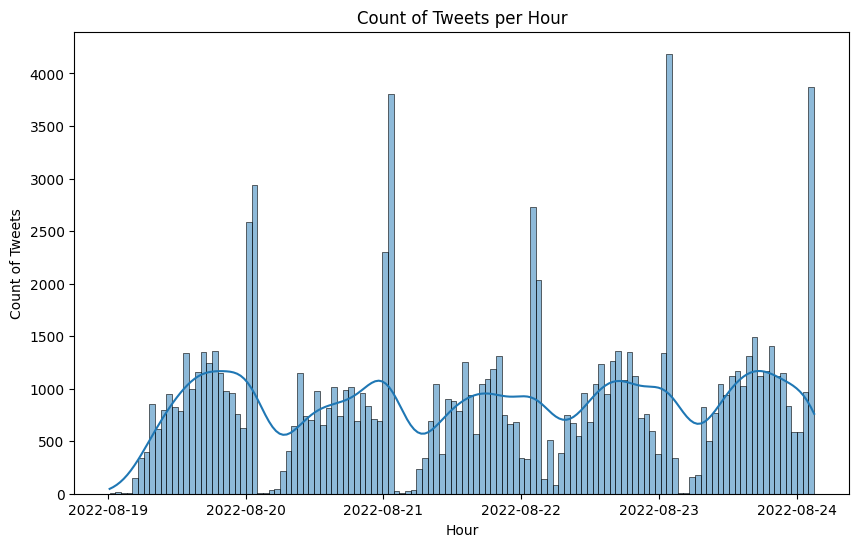

In [13]:
# plot number of tweets per hour
fig, axs = plt.subplots(figsize=(10, 6))
sns.histplot(df_clean["extractedts"],bins=unique_combinations, kde=True,ax=axs)
plt.title("Count of Tweets per Hour")
plt.xlabel('Hour')
plt.ylabel('Count of Tweets')

## Amount of tweets per hour and per day of week


In [14]:
tweet_counts_per_hour = df_clean.groupby('hour').size()
tweet_counts_per_day_of_week = df_clean.groupby('day_of_week').size()
print(tweet_counts_per_hour)
tweet_counts_per_day_of_week

hour
0      7831
1     10347
2      8934
3      1214
4       824
5       632
6      1189
7      2664
8      3192
9      4979
10     3559
11     4304
12     5597
13     4312
14     5418
15     5594
16     5504
17     5900
18     6158
19     5393
20     4891
21     4727
22     3428
23     2861
dtype: int64


day_of_week
0    21766
1    23844
2     5524
4    17663
5    19759
6    20896
dtype: int64

In [15]:
correlation = tweet_counts_per_hour.corr(pd.Series(tweet_counts_per_hour.index))
print("Correlation (hour):", correlation)
correlation = tweet_counts_per_day_of_week.corr(pd.Series(tweet_counts_per_day_of_week.index))
print("Correlation (day of week):", correlation)
print("There is no significant correlation neither between hour or day of week and amount of tweets")

Correlation (hour): -0.046567077090896004
Correlation (day of week): -0.08322994794493212
There is no significant correlation neither between hour or day of week and amount of tweets


In [16]:
df_clean["hashtags"] = df_clean["hashtags"].apply(lambda x: ast.literal_eval(x.replace("'", "\""))) # hashtags strings to list of dictionaires

In [17]:
def remove_hashtags_links_and_emojis(text):
    # Regular expression to match hashtags and links
    hashtag_pattern = r'#\S+'
    link_pattern = r'http\S+|www.\S+'
    
    # Unicode ranges for emojis
    emoji_pattern = r'[' \
                    u'\U0001F600-\U0001F64F' \
                    u'\U0001F300-\U0001F5FF' \
                    u'\U0001F680-\U0001F6FF' \
                    u'\U0001F1E0-\U0001F1FF' \
                    u'\U00002702-\U000027B0' \
                    u'\U000024C2-\U0001F251' \
                    ']+'
    
    # Combine all patterns
    combined_pattern = f'({hashtag_pattern})|({link_pattern})|({emoji_pattern})'
    
    # Replace hashtags, links, and emojis with an empty string
    return re.sub(combined_pattern, '', text)

In [18]:
df_clean.loc[:,"text_clean"] = df_clean["text"].apply(lambda x: remove_hashtags_links_and_emojis(x)) # removing hashtags and links from texts

In [19]:
df_clean.loc[:,"polarity"] = df_clean["text_clean"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_clean.loc[:,"subjectivity"] = df_clean["text_clean"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [20]:
df_clean.count()

location         73700
text            109452
extractedts     109452
hashtags        109452
day_of_week     109452
hour            109452
text_clean      109452
polarity        109452
subjectivity    109452
dtype: int64

Positive count: 41943
Negative count: 24812
Neutral count: 42697


,location,text,extractedts,hashtags,day_of_week,hour,text_clean,polarity,subjectivity
0,afrika borwa,Dear vaccine advocate\n\nDo take the COVID19 m...,2022-08-19 08:07:26.836769,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",4,8,Dear vaccine advocate\n\nDo take the COVID19 m...,0.050000,0.050000
2,ukraine,"Welcome to our shelter!\nLocated in Ukraine, K...",2022-08-19 11:22:26.824532,"[{'text': 'Ukraine', 'indices': [194, 202]}, {...",4,11,"Welcome to our shelter!\nLocated in Ukraine, K...",1.000000,0.900000
3,NaN,👇 Good news you may have missed: First @WFP sh...,2022-08-19 05:12:06.096707,"[{'text': 'humanitarian', 'indices': [66, 79]}...",4,5,Good news you may have missed: First @WFP shi...,0.135714,0.419048
5,NaN,"Ethereum's spot setup looks grim, but derivati...",2022-08-19 05:12:06.018650,"[{'text': 'cryptocurrency', 'indices': [79, 94...",4,5,"Ethereum's spot setup looks grim, but derivati...",-0.500000,0.800000
6,united states,🛢 Today's Crude Oil Prices:\r📈 WTI: $90.63 (+0...,2022-08-19 08:04:59.090331,"[{'text': 'putin', 'indices': [93, 99]}, {'tex...",4,8,Today's Crude Oil Prices:\r WTI: $90.63 (+0.1...,-0.700000,1.000000
...,...,...,...,...,...,...,...,...,...
109441,NaN,A car is far more affordable &amp; far more es...,2022-08-24 02:15:25.791994,"[{'text': 'studentloan', 'indices': [80, 92]},...",2,2,A car is far more affordable &amp; far more es...,0.283333,0.633333
109444,"bothell, wa",@MarkHertling Thank you so much for your persp...,2022-08-24 02:22:04.808578,"[{'text': 'SlavaUkraini', 'indices': [157, 170...",2,2,@MarkHertling Thank you so much for your persp...,0.446429,0.558929
109445,tokyo,🇺🇦 Science is organized knowledge. Wisdom is o...,2022-08-24 02:35:08.377054,"[{'text': 'slavaukraini', 'indices': [173, 186...",2,2,Science is organized knowledge. Wisdom is org...,0.400000,0.500000
109448,star wars,on three sides near #Kodema destroyed.\n\nSucc...,2022-08-24 02:00:23.155271,"[{'text': 'Kodema', 'indices': [20, 27]}, {'te...",2,2,on three sides near destroyed.\n\nSuccessful ...,0.425000,0.675000


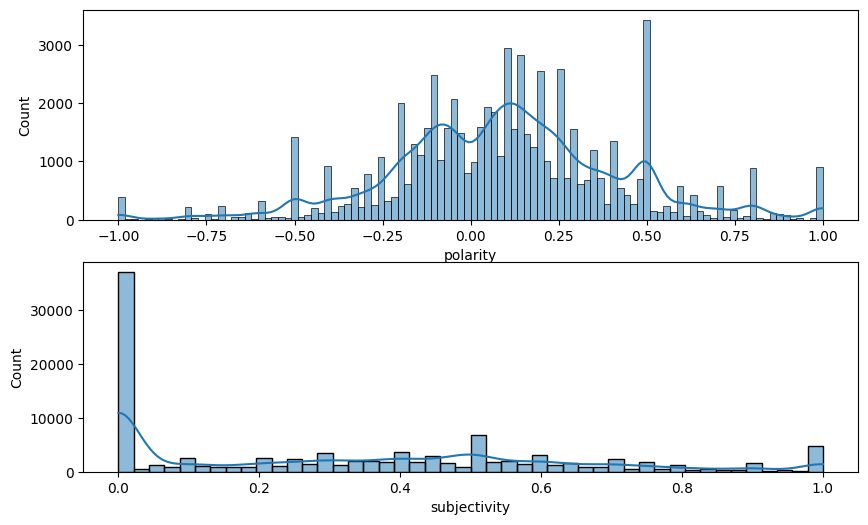

In [39]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))
sr = df_clean[df_clean["polarity"] != 0]
sns.histplot(data = sr["polarity"] ,ax=ax1,kde=True)
sns.histplot(df_clean["subjectivity"],ax=ax2,kde=True)
print("Positive count:",(df_clean["polarity"] > 0).sum())
print("Negative count:",(df_clean["polarity"] < 0).sum())
print("Neutral count:",(df_clean["polarity"] == 0).sum())

<Axes: ylabel='Count'>

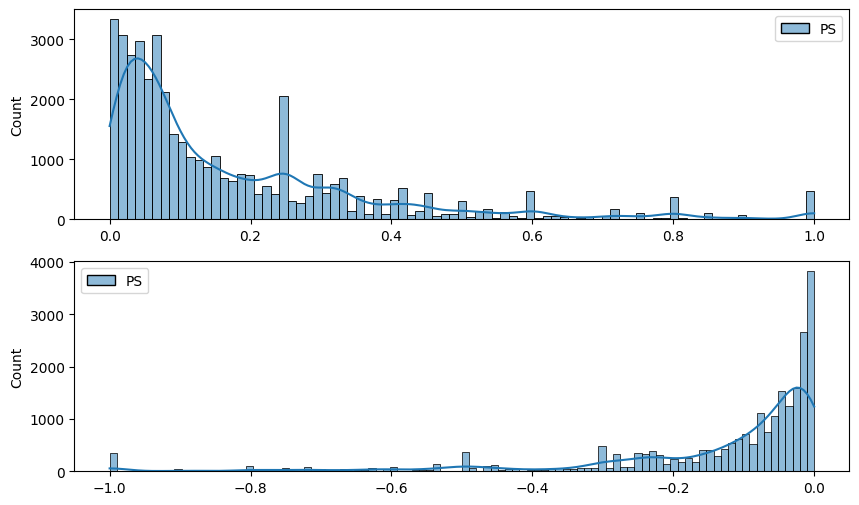

In [22]:
df_col = pd.DataFrame({"PS":df_clean["polarity"]*df_clean["subjectivity"]})
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))
sns.histplot(df_col.query("PS > 0"),ax=ax1,kde=True)
sns.histplot(df_col.query("PS < 0"),ax=ax2,kde=True)

In [24]:
df_clean

,location,text,extractedts,hashtags,day_of_week,hour,text_clean,polarity,subjectivity
0,afrika borwa,Dear vaccine advocate\n\nDo take the COVID19 m...,2022-08-19 08:07:26.836769,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",4,8,Dear vaccine advocate\n\nDo take the COVID19 m...,0.050000,0.050000
1,ukraine,"Animal shelter Dogs and Cats, we need your hel...",2022-08-19 05:12:06.194216,"[{'text': 'Ukraine', 'indices': [189, 197]}, {...",4,5,"Animal shelter Dogs and Cats, we need your hel...",0.000000,0.000000
2,ukraine,"Welcome to our shelter!\nLocated in Ukraine, K...",2022-08-19 11:22:26.824532,"[{'text': 'Ukraine', 'indices': [194, 202]}, {...",4,11,"Welcome to our shelter!\nLocated in Ukraine, K...",1.000000,0.900000
3,NaN,👇 Good news you may have missed: First @WFP sh...,2022-08-19 05:12:06.096707,"[{'text': 'humanitarian', 'indices': [66, 79]}...",4,5,Good news you may have missed: First @WFP shi...,0.135714,0.419048
4,nyc,Opinion: The Ukraine war is also being fought ...,2022-08-19 08:02:53.510769,"[{'text': 'Ukraine', 'indices': [68, 76]}, {'t...",4,8,Opinion: The Ukraine war is also being fought ...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
109447,peoples republic,@olehbatkovych Fight Fascism The Soviet Way......,2022-08-24 02:35:08.365405,"[{'text': 'Ukraine', 'indices': [47, 55]}]",2,2,@olehbatkovych Fight Fascism The Soviet Way......,0.000000,0.000000
109448,star wars,on three sides near #Kodema destroyed.\n\nSucc...,2022-08-24 02:00:23.155271,"[{'text': 'Kodema', 'indices': [20, 27]}, {'te...",2,2,on three sides near destroyed.\n\nSuccessful ...,0.425000,0.675000
109449,germany,@VictoriaYastrub this is #pedoputin s #RussiaI...,2022-08-24 03:00:39.715739,"[{'text': 'pedoputin', 'indices': [25, 35]}, {...",2,3,@VictoriaYastrub this is s,0.000000,0.000000
109450,"toronto, canada","Trudeau, Scholz to sign #hydrogendeal as Germa...",2022-08-24 02:35:08.342518,"[{'text': 'hydrogendeal', 'indices': [24, 37]}...",2,2,"Trudeau, Scholz to sign as Germany eyes futu...",0.000000,0.125000
